In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from core.arithmetic_manager import ArithManager
from core.my_exception import *
from core.util import *
import math

In [22]:
def solve(expr, domain, show_ast = False, show_blocks = False, show_latex = False):
    AM = ArithManager(domain)
    
    ast = AM.shuntingYardExpr2ast(expr)
    if show_ast: display(ast)
        
    blocks = AM.blocks(ast)
    
    if show_blocks: 
        for block in blocks:
            display(block[1])
        
    MEMORY = dict(blocks)
    main_block = blocks[-1][1]
    child_to_calc = None
    current_block = block_id = None

    while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]

    while blocks:
        block_id, current_block = blocks[0]
        parent_to_calc = AM.prior(current_block)
        tex = AM.latex(main_block, MEMORY)
        if show_latex: display_latex(tex)
        parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                    if is_next_to_calc(child) else child
                                    for child in parent_to_calc.children]

        if is_calculable(current_block):
            current_block = current_block.children[0]
            blocks = blocks[1:]

        MEMORY[block_id] = current_block

    tex = AM.latex(main_block, {})
    if show_latex: display_latex(tex)
    
    return main_block.children[0].root['value']





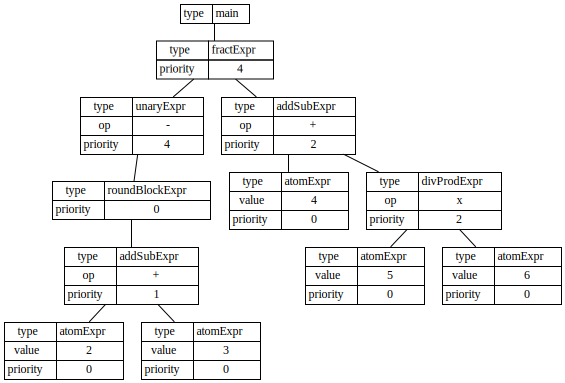

Fraction(-5, 34)

In [26]:
ex1 = '1 + {2 x [(3 + 4 : 2) + 5] x 6} - [ 7 + (1 + 8) : 3 ] x [ 9 : (2 + 1) + 2 ]'
ex2 = '< 2 + 3 > / 4 / < 5 + 6 > / 7'
ex3 = '2 ^ < 3 + 4 ^ 5 : 2 ^ 7 >'
ex4 = '3 + 13 x -<1 + 3>/<2^<1+4> - 6>'
ex5a = '3 / < 4 + 2 > + 2 x { 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > } - < 2 x [ 5 x ( 3 + 4 ) + 5 ] - 1 > / 6 + 1.8'
ex5b = '3 / < 4 + 2 > + 2 x ( 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > ) - < 2 x ( 5 x ( 3 + 4 ) + 5 ) - 1 >'


src = """
- (2 + 3) / <4 + 5 x 6>
"""
solve(src, 'Q', show_ast = True)

In [5]:
if is_integer(str(Fraction(3, 1))):
    print("SI")
    


SI


In [146]:
r = r'([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+))$'
if re.match(r, '1e6'): print("*****")

*****
